In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [43]:
files = Path(r'C:\Users\netan\Documents\code\big-data-project\data\pageviews').glob('*.csv')

In [44]:
print(len(list(files)))
files = Path(r'C:\Users\netan\Documents\code\big-data-project\data\pageviews').glob('*.csv')


892


In [13]:
dfs = []
for file in files:
    dfs.append(pd.read_csv(str(file)))
    
dfs[0]

,Unnamed: 0,article,timestamp,views
0,0,1989_(Taylor_Swift_album),2015070100,7758
1,1,1989_(Taylor_Swift_album),2015070200,7226
2,2,1989_(Taylor_Swift_album),2015070300,7341
3,3,1989_(Taylor_Swift_album),2015070400,6944
4,4,1989_(Taylor_Swift_album),2015070500,7094
...,...,...,...,...
3132,3132,1989_(Taylor_Swift_album),2024012700,128
3133,3133,1989_(Taylor_Swift_album),2024012800,153
3134,3134,1989_(Taylor_Swift_album),2024012900,174
3135,3135,1989_(Taylor_Swift_album),2024013000,166


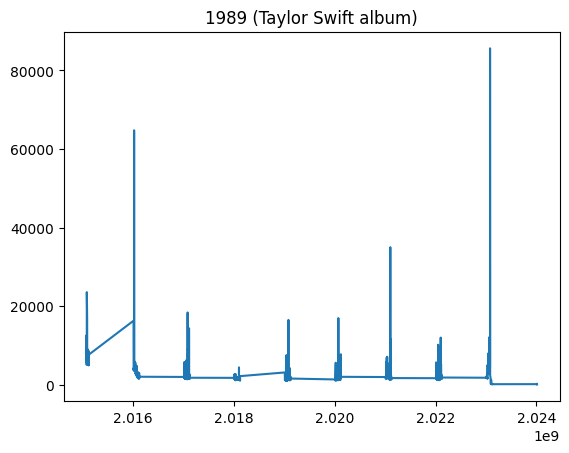

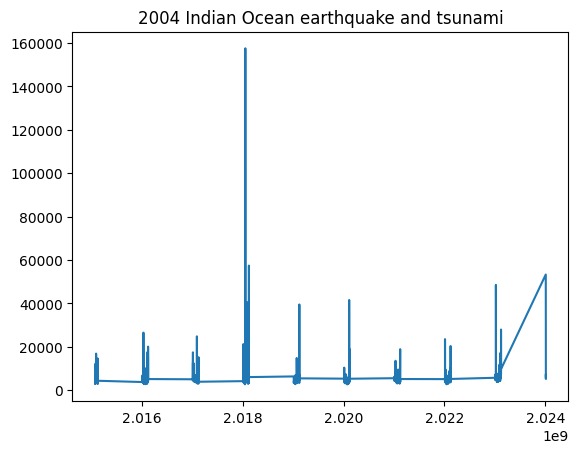

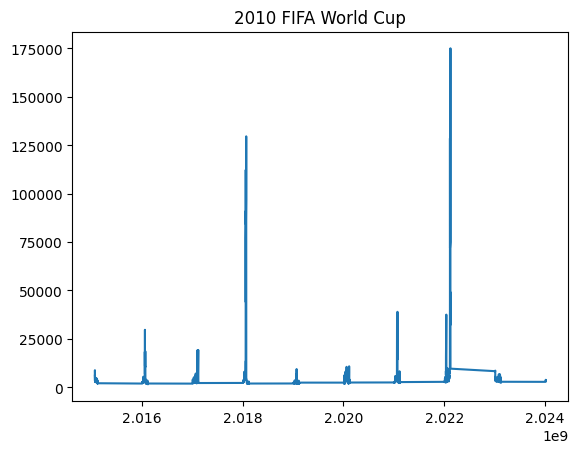

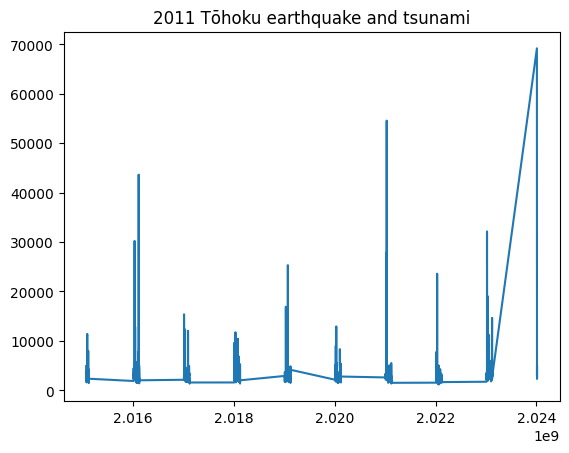

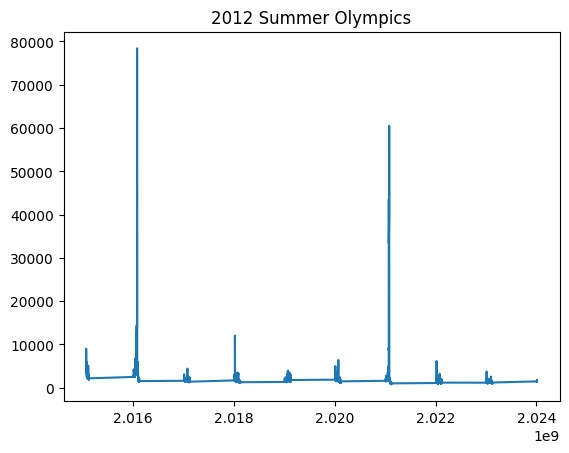

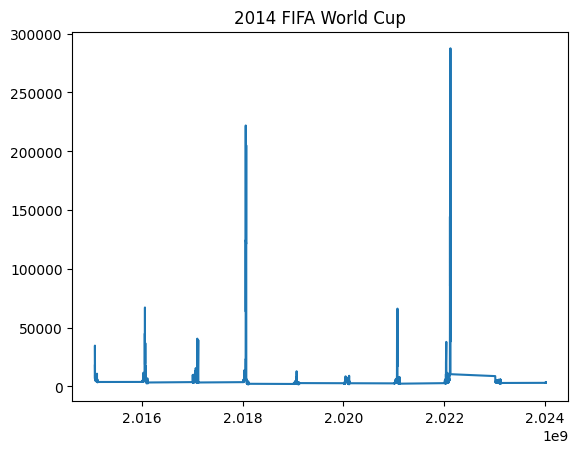

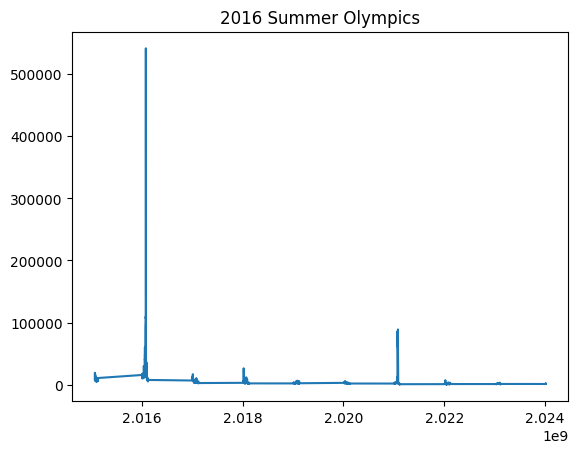

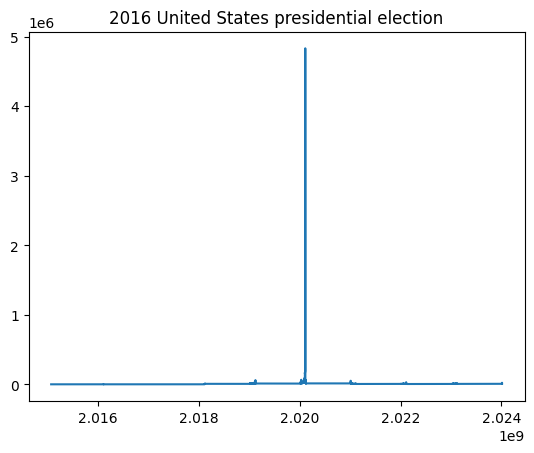

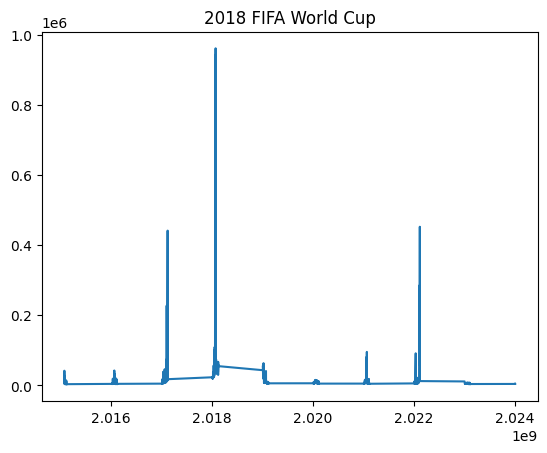

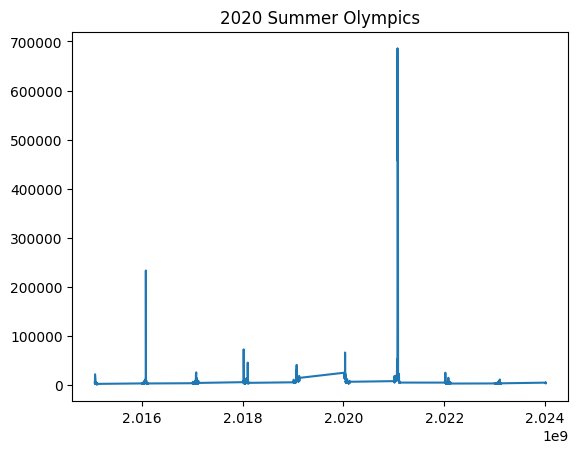

In [14]:
for df in dfs[:10]:
    plt.plot(df.timestamp, df.views)
    plt.title(df.article[0].replace('_', ' '))
    plt.show()

In [15]:
def timestamp2datetime(timestamp):
    timestamp = str(timestamp)
    year = timestamp[:4]
    month = timestamp[4:6]
    day = timestamp[6:8]
    return f'{year}-{month}-{day}'

timestamp2datetime('2017030700')

'2017-03-07'

In [16]:
election = pd.read_csv(r'C:\Users\netan\Documents\code\big-data-project\data\pageviews\2020_United_States_presidential_election.csv')

election['date'] = pd.to_datetime(election['timestamp'].apply(timestamp2datetime))
election.date

0      2017-03-07
1      2017-03-08
2      2017-03-09
3      2017-03-10
4      2017-03-11
          ...    
2516   2024-01-27
2517   2024-01-28
2518   2024-01-29
2519   2024-01-30
2520   2024-01-31
Name: date, Length: 2521, dtype: datetime64[ns]

In [17]:
wtc = pd.read_csv(r'C:\Users\netan\Documents\code\big-data-project\data\pageviews\7_World_Trade_Center.csv')

wtc['date'] = pd.to_datetime(wtc['timestamp'].apply(timestamp2datetime))
wtc.date

0      2015-07-01
1      2015-07-02
2      2015-07-03
3      2015-07-04
4      2015-07-05
          ...    
3132   2024-01-27
3133   2024-01-28
3134   2024-01-29
3135   2024-01-30
3136   2024-01-31
Name: date, Length: 3137, dtype: datetime64[ns]

In [34]:
f'{sum([len(df) for df in dfs]):,}'

'2,760,522'

In [19]:
from pyts.approximation import SymbolicAggregateApproximation

In [20]:
sax = SymbolicAggregateApproximation()
sax.fit_transform(election['views'].values.reshape(1, -1))[:, 1000:1500]

array([['d', 'd', 'c', 'c', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
        'c', 'c', 'c', 'd', 'd', 'c', 'c', 'c', 'b', 'b', 'b', 'c', 'b',
        'b', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
        'c', 'c', 'd', 'd', 'd', 'd', 'c', 'c', 'c', 'c', 'd', 'd', 'c',
        'c', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'c', 'd', 'd', 'd', 'd',
        'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
        'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
        'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
        'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'c',
        'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd',
        'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
        'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
        'd', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
        'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd'

<Axes: >

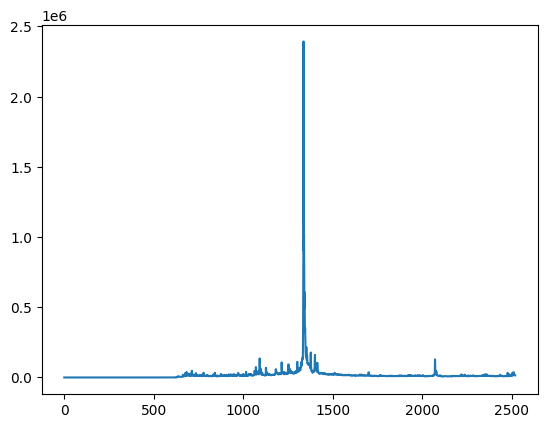

In [49]:
election.views.plot()